<a href="https://colab.research.google.com/github/Faitsu/Basic-Computer-Graphics-Notebook/blob/main/InfoVisHW_emc689.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS-GY 6313/CUSP-GX 6006 Information Assignment 1

Given: Two triangle positions in 3D, triangle colors, and camera parameters. 

Output: Saved and visualizable color images from the three given cameras (as .png, .jpg, etc.)

##Inputs:

3D Coordinates of the vertices two triangles (vertices1, vertices2, vertices3)

```
tri1_vertices = [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2)]
tri2_vertices = [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2)] 
```
Camera parameters (position, forward/facing direction, up/camera orientation, fov). Assume aspect ratio is 1:1 and FOV in degrees.
```
cam1 = [(x0, y0, z0), (x0_f, y0_f, z0_f), (x0_u, y0_u, z0_u), fov0]
cam2 = [(x1, y1, z1), (x1_f, y1_f, z1_f), (x1_u, y1_u, z1_u), fov1]
cam3 = [(x2, y2, z2), (x2_f, y2_f, z2_f), (x2_u, y2_u, z2_u), fov2]
```



Changelog: 
10/6: Fixed last row of translate_center_to_origin to be [0, 0, 0, 1] instead of [0, 0, 1, 0]
9/29: Fixed a variable typo in scale_by_2_matrix to 2/(t-b), orginally 2/(l-b) 

# Programming exercises

In [ ]:
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt 
import numpy as np

drive.mount('/content/drive')

## Render triangles in camera using CPU-only rasterisation.


Write a function to render an image using camera settings and triangle vertices as the input. Write your own code for rasterization to render a triangle pixel-by-pixel. You can use any method to show the triangles (ex. Matplotlib, OpenCV, plotly, etc.) as long as you first perform Model-View-Projection.






# Complete the functions for Model View Projection

Model: objects to coordinates in world space

View: from world space to camera space

Projection: from camera space to clip/screen space

In [ ]:
#These are funtions that could be useful ie. Cross product, normalize,etc...

def magni_three(x, y, z) : #finds magnitude of a 3 dimentional vector
	return np.sqrt(x*x + y*y + z * z)


def cross_product( m, n) :#function used to calculate the cross product where m is point1 and n is point2
  p = [0,0,0] #define point

  p[0] = round(m[1]*n[2]-m[2]*n[1],2)
  p[1] = round(m[2]*n[0]- m[0]*n[2],2)
  p[2] = round(m[0]*n[1]-m[1]*n[0],2)
  return p

def normalize(v):
  #normalize vector
  nv = [0,0,0]
  d = magni_three(v[0], v[1], v[2])
  nv[0] = round(v[0]/d,2)
  nv[1] = round(v[1]/d,2)
  nv[2] = round(v[2]/d,2)

  return nv

def vect_calc(p1, p2) : #calculates value for vector
  v = [0,0,0]
  v[0] = p2[0]-p1[0];
  v[1] = p2[1]-p1[1];
  v[2] = p2[2]-p1[2];

  return v

def create_transfvect(point):
    return [[point[0]],[point[1]],[point[2]],[1]] #makes a point ready for transformations

def edgeFunct(v1, v2, p): #use this as the edge function for two vertices and a point
  return (((p[0]-v1[0])*(v2[1]-v1[1]))-((p[1]-v1[1])*(v2[0]-v1[0])) >= 0)

def pointEdge (verts, j,i): #determines if point is inside circle, need both or algo does not work
  return ((edgeFunct(verts[0],verts[1],[i,j]) and edgeFunct(verts[1],verts[2],[i,j]) and edgeFunct(verts[2],verts[0],[i,j]))
   or ((edgeFunct(verts[1],verts[0],[i,j]) and edgeFunct(verts[2],verts[1],[i,j]) and edgeFunct(verts[0],verts[2],[i,j]))))

def convertToScreen(tri1,tri2, height, width): 
  #converts all values of the triangle into screen coordinates and returns arrays containting triangle ppoints to draw
  scalew =  width #scaled width
  scaleh =  height #scaled height
  conv_tri1 = [] #converted first triangle into screen space
  conv_tri2 = [] #converted second triangle
  vert1 = [] #Verticies of triangle 1 in Screen Space
  vert2 = [] #Verticies of triangle 2 in Screen Space

  minh = height #initalize minimum height
  minw = width  #initalize minimum width

  maxw = -1 #initalize max width
  maxh = -1 #maximize max height

  for i in range(0,3):
    #scale the verticies
    point1 = [int(round(tri1[i][0] * scalew +width,0)), int(round(tri1[i][1] *  scaleh+height,0)), int(round(tri1[i][2] * 100,0))]
    point2 = [int(round(tri2[i][0] * scalew +width,0)), int(round(tri2[i][1] * scaleh+height,0)), int(round(tri2[i][2] * 100,0))]

    #update mins and max
    if (point1[0]<minw or point2[0] <minw):
      minw = min(point1[0],point2[0])
    if (point1[0]>maxw or point2[0] >maxw):
      maxw = max(point1[0],point2[0])

    if (point1[1]<minh or point2[1] <minh):
      minh = min(point1[1],point2[1])
    if (point1[1]>maxh or point2[1] >maxh):
      maxh = max(point1[1],point2[1])
    
    #record verticies
    vert1.append([tri1[i][0] * scalew +width, tri1[i][1] *  scaleh+height,tri1[i][2] * 100])
    vert2.append([tri2[i][0] * scalew +width, tri2[i][1] *  scaleh+height,tri2[i][2] * 100])
    
   

  #negative numbers will mess up my 
  if (minh < 0):
    minh = 0
  if (minw < 0):
    minw = 0

  if (maxw >2*width - 1):
    maxw = 2*width - 1
  if (maxh > 2*height - 1):
    maxh = 2*height - 1

  for i in range(minw, maxw+1):
    for j in range(minh, maxh+1):
      if pointEdge(vert1, j, i): #point is inside the triangle
        conv_tri1.append([i,j]) # record triangle point for first triangle
      if pointEdge(vert2, j , i):
        conv_tri2.append([i,j])#record triangle point for second triangle
                              
  return conv_tri1, conv_tri2,vert1,vert2


In [ ]:
# Since our triangle vertices are already in world space (x, y, z), there's
# no need write a function for the Model part of MVP! We can jump directly to 
# getting the view matrix and using that to get the camera coordinates.

In [ ]:
def view(camera, triangle1, triangle2):
  ### TODO: Find R_view and T_view using the camera settings
  
  ##Rview is rotation and T view is translation

  #we need to find the normalized vectors for look at and up direction

  e = camera[0] #eye
  g = normalize(vect_calc(camera[1],e)) #normalize eye-at vector
  x = normalize(cross_product(g,camera[2])) #x axis vector
  t = normalize(cross_product(g,x)) #y axis
  
  #print("g: ", g ,'\n')
  #print("t: ", t ,'\n')
  #print("x: ", x ,'\n')

  #rotation matrix
  R_view = [[x[0],x[1],x[2],0],
            [t[0],t[1],t[2],0],
            [g[0],g[1],g[2],0],
            [0,0,0,1]]

  #translation matrix
  T_view = [[1,0,0,-e[0]],
            [0,1,0,-e[1]],
            [0,0,1,-e[2]],
            [0,0,0,1]]

  #Model View Matrix from Multiplying R_view & T_view
  M_view = np.matmul(R_view, T_view)
  #print("CURR M_VIEW: ", M_view, '\n')
  ### TODO: Use M_view to find the vertices coordinates in camera space

  #convert triangles 1 and 2 into a 4x4 matrix
  tri1 =[]
  tri2 = []

  for i in range (0,3): #for each triangle, transform them by the view matrix
    temp1 = create_transfvect(triangle1[i])
    temp2 = create_transfvect(triangle2[i])

    ti1 = np.matmul(M_view,temp1)
    ti2 = np.matmul(M_view,temp2)

    t1 = [ti1[0][0],ti1[1][0],ti1[2][0]]
    t2 = [ti2[0][0],ti2[1][0],ti2[2][0]]

    tri1.append(t1)
    tri2.append(t2)
  tri1_in_camera_space = tri1 
  tri2_in_camera_space = tri2 

  #should return a 4x4 matrix
  return tri1_in_camera_space, tri2_in_camera_space

In [ ]:
#DEBUG #1: TESTING VIEW SPACE

# Triangle vertices in 3D world space
tri1 = [(0, 0, 0), (0, 30, 0), (35, 0, 35)] # RGB(255, 0, 0), Red
tri2 = [(17, 0, 0), (0, 0, 17), (17, 45, 17)] # RGB(0, 255, 0), Green

cam1 = [(50, 10, 0), (0, 10, 0), (0, 1, 0), 90] 
cam2 = [(50, 10, 0), (0, 10, 0), (0, -1, 0), 105]
cam3 = [(0, 10, 50), (0, 10, 0), (0, 1, 0), 120] 

tri1_in_camera_space, tri2_in_camera_space = view(cam1,tri1,tri2)

tri1_in_camera_space, tri2_in_camera_space = view(cam2,tri1,tri2)
tri1_in_camera_space, tri2_in_camera_space = view(cam3,tri1,tri2)
#print("TRI 1: ",tri1_in_camera_space,"\n TRI 2: ",tri2_in_camera_space)

CURR M_VIEW:  [[  0.   0.   1.   0.]
 [  0.  -1.   0.  10.]
 [  1.   0.   0. -50.]
 [  0.   0.   0.   1.]] 

CURR M_VIEW:  [[  0.   0.  -1.   0.]
 [  0.   1.   0. -10.]
 [  1.   0.   0. -50.]
 [  0.   0.   0.   1.]] 

CURR M_VIEW:  [[ -1.   0.   0.   0.]
 [  0.  -1.   0.  10.]
 [  0.   0.   1. -50.]
 [  0.   0.   0.   1.]] 

TRI 1:  [[0.0, 10.0, -50.0], [0.0, -20.0, -50.0], [-35.0, 10.0, -15.0]] 
 TRI 2:  [[-17.0, 10.0, -50.0], [0.0, 10.0, -33.0], [-17.0, -35.0, -33.0]]


In [ ]:
def get_M_persp(field_of_view):
  aspect_ratio = 1
  ### TODO: Define r, l, b, t, n, and f. Return M_persp

  n = 0.1 # You can choose some very small number
  f = 100 # You can choose some very large number
  t = np.abs(n) * np.tan(np.deg2rad(field_of_view/2))
  r = aspect_ratio * t
  l = -r
  b = -t

  scale_by_2 = [[2/(r-l), 0, 0, 0], 
               [0, 2/(t-b), 0 , 0],
               [0, 0, 2/(n-f), 0],
               [0, 0, 0, 1]]

  translate_center_to_origin = [[1, 0, 0, -(r+l)/2],
                                [0, 1, 0, -(t+b)/2],
                                [0, 0, 1, -(n+f)/2],
                                [0, 0, 0, 1]]

  M_ortho = np.matmul(scale_by_2,translate_center_to_origin,)

  ### TODO: Find M_persp
  M_ortho_persp = [[n,0,0,0],
                  [0,n,0,0],
                  [0,0,n+f,-n*f],
                  [0,0,1,0]]

  M_persp = np.matmul(M_ortho, M_ortho_persp)
  return M_persp

def perspective_projection(field_of_view, tri1, tri2):
  M_persp = get_M_persp(field_of_view)
  #print("M PRESPECTIVE: ", M_persp, '\n')
  ### TODO: Use M_persp to find the verticees coordinates in camera space
  
  triangle1 =[]
  triangle2 = []

  for i in range (0,3): #for each triangle, transform them by the projection
    temp1 = create_transfvect(tri1[i])
    temp2 = create_transfvect(tri2[i])

    t1 = np.matmul(M_persp,temp1)
    t2 = np.matmul(M_persp,temp2)

    #print("CURRENT t1:", t1, "\n CURRENT t2: ", t2, '\n')

    h1 = t1[3][0] 
    h2 = t2[3][0] 

    t1 = [round(t1[0][0]/h1,3),round(t1[1][0]/h1 ,3),round(t1[2][0]/h1,3)]
    t2 = [round(t2[0][0]/h2,3),round(t2[1][0]/h2,3),round(t2[2][0]/h2,3)]

    triangle1.append(t1)
    triangle2.append(t2)
  tri_1_screen_coordinates = triangle1 # Find
  tri2_screen_coordinates = triangle2 # Find

  return tri_1_screen_coordinates, tri2_screen_coordinates

In [ ]:
def mvp(camera, triangle1, triangle2): #combine model view and projection parts
  tri1_in_camera_space, tri2_in_camera_space = view(camera,triangle1,triangle2)
  tri1_in_screen_space, tri2_in_screen_space = perspective_projection(camera[3], tri1_in_camera_space, tri2_in_camera_space)
  return tri1_in_screen_space, tri2_in_screen_space

In [ ]:
def rasterize(tri1, tri2,size): #draw points on screen
  pixels = np.zeros(shape = (size, size,3)) #size = length of width and height in pixel units 
  #print("TRIANGLE 1 SCREEN:",tri1,"\n TRIANGLE 2 SCREEN:", tri2, '\n')
  for i in range(0,len(tri1)):
    if(0<=tri1[i][1] and tri1[i][1]< size and 0<=tri1[i][0] and tri1[i][0]< size):
      pixels[tri1[i][1]][tri1[i][0]] = [255,0,0]
  
  for j in range(0, len(tri2)):
    if(0<=tri2[j][1] and tri2[j][1]< size and 0<=tri2[j][0] and tri2[j][0]< size):
      pixels[tri2[j][1]][tri2[j][0]] = [0,255,0]
      
  return pixels

def anti_aliasing(pixels,size): #downsamples a higher resolution image (1000x1000) to (100x100)
  new_pixels = np.zeros(shape = (size//10, size//10, 3)) # 100x100 matrix of RGB values 
  for i in range(0,size,10):
    for j in range(0,size,10):
      color = [0,0,0]
      count = 0
      #sample average color
      for k in range(0,10):
        for m in range(0,10):
          color = [pixels[k+i][m+j][0] + color[0],pixels[k+i][m+j][1] + color[1], pixels[k+i][m+j][2] + color[2]]
          count += 1
      color = [(color[0]/count)/255, (color[1]/count)/255,(color[2]/count)/255]
      new_pixels[i//10][j//10] = color
      #if color[0] >= 10 and color[0] <255 :
        #print("curr coords:", i//10, ',', j//10, "COLOR: ",color, '\n')
  return new_pixels

def setup_z_buffer_coeff(vert):  #give in the z-buffer and triangle vertex and loop through buffer
  temp_vect1 = vect_calc(vert[2],vert[0])
  temp_vect2 = vect_calc(vert[2],vert[1])

  plane_coef = cross_product(temp_vect1,temp_vect2)

  constVal = plane_coef[0]*vert[2][0]+plane_coef[1]*vert[2][1]+plane_coef[2]*vert[2][2] #use points from one of the vertices

  plane_coef.append(constVal)

  return plane_coef

def z_buffer_tri(coeff, z_buff,screen,tri_points,color): #checks if point in triangle is closer than point stored in z buffer
  a = coeff[0]
  b = coeff[1]
  c = coeff[2]
  d = coeff[3]

  for i in range(0,len(tri_points)):
    #figure out z value per each points
    x = tri_points[i][0]
    y = tri_points[i][1]
    z = (d - b*tri_points[i][1] - a*tri_points[i][0])/c
    if(z_buff[y][x] == float('inf') or z < z_buff[y][x]): #if curr point is closest to the screen
      z_buff[y][x] = z #record closer z value
      screen[y][x] = color #color this point color of triangle
  return screen,z_buff

In [ ]:
# Triangle vertices in 3D world space
tri1 = [(0, 0, 0), (0, 30, 0), (35, 0, 35)] # RGB(255, 0, 0), Red
tri2 = [(17, 0, 0), (0, 0, 17), (17, 45, 17)] # RGB(0, 255, 0), Green

# cam = [(x, y, z), (x_f, y_f, z_f), (x_u, y_u, z_u), fov]
# The first coordinate is where the camera is in world space. The second is what
# coordinate it is looking at/facing. The third represents the "up" axis.  
# Ex. cam1, cam3 up = positive of y-axis. cam2 up = negative if y-axis (upside-down camera)
cam1 = [(50, 10, 0), (0, 10, 0), (0, 1, 0), 90] 
cam2 = [(50, 10, 0), (0, 10, 0), (0, -1, 0), 105]
cam3 = [(0, 10, 50), (0, 10, 0), (0, 1, 0), 120] 

#z_buffer variables
z_buffer1 = np.zeros(shape = (1000, 1000)) 
for i in range(0,1000):
  for j in range(0,1000):
    z_buffer1[i][j] = float('inf')

z_buffer2 = np.zeros(shape = (1000, 1000))
for i in range(0,1000):
  for j in range(0,1000):
    z_buffer2[i][j] = float('inf')

z_buffer3 = np.zeros(shape = (1000, 1000)) 
for i in range(0,1000):
  for j in range(0,1000):
    z_buffer3[i][j] = float('inf')

perspective1_tri1, perspective1_tri2 = mvp(cam1, tri1, tri2)
perspective2_tri1, perspective2_tri2 = mvp(cam2, tri1, tri2)
perspective3_tri1, perspective3_tri2 = mvp(cam3, tri1, tri2)

#convert perspective ratios into screen coordinates
tri1_1, tri1_2,vert1,vert2 = convertToScreen(perspective1_tri1, perspective1_tri2,500, 500)
tri2_1, tri2_2,vert21,vert22 = convertToScreen(perspective2_tri1, perspective2_tri2,500, 500)
tri3_1, tri3_2,vert31,vert32 = convertToScreen(perspective3_tri1, perspective3_tri2,500, 500)

# Draw triangles in 2D

perspective1 = rasterize(tri1_1, tri1_2,1000) 
perspective2 = rasterize(tri2_1, tri2_2,1000)
perspective3 = rasterize(tri3_1, tri3_2,1000)

#create coefficents for plane equations of each triangle
coeff1 = setup_z_buffer_coeff(vert1)
coeff2 = setup_z_buffer_coeff(vert2)

coeff21 = setup_z_buffer_coeff(vert21)
coeff22 = setup_z_buffer_coeff(vert22)

coeff31 = setup_z_buffer_coeff(vert31)
coeff32 = setup_z_buffer_coeff(vert32)

#z-buffer for each triangle in the image
perspective1,z_buffer1 = z_buffer_tri(coeff1,z_buffer1,perspective1,tri1_1,[255,0,0]) 
perspective1,z_buffer1 = z_buffer_tri(coeff2,z_buffer1,perspective1,tri1_2,[0,255,0])

perspective2,z_buffer2 = z_buffer_tri(coeff21,z_buffer2,perspective2,tri2_1,[255,0,0]) 
perspective2,z_buffer2 = z_buffer_tri(coeff22,z_buffer2,perspective2,tri2_2,[0,255,0])

perspective3,z_buffer3 = z_buffer_tri(coeff31,z_buffer3,perspective3,tri3_1,[255,0,0]) 
perspective3,z_buffer3 = z_buffer_tri(coeff32,z_buffer3,perspective3,tri3_2,[0,255,0])
 
#Anti-Aliasing 
perspective1 = anti_aliasing(perspective1,1000)
perspective2 = anti_aliasing(perspective2,1000)
perspective3 = anti_aliasing(perspective3,1000)




Save the 100x100x3 RGB images you rendered with the given camera settings and triangle vertices. Images can be displayed using MatplotLib.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

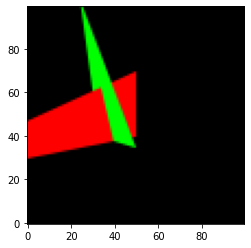

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

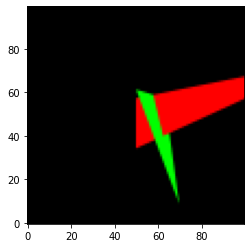

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

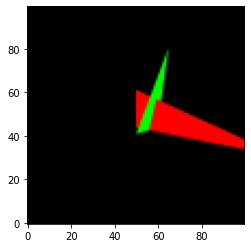

In [ ]:
# Save and view images
# origin = "lower" sets origin of plot to bottom left
plt.imshow(perspective1, origin="lower") 
plt.savefig('perspective1.png')
files.download("perspective1.png") 
plt.show()
plt.imshow(perspective2, origin="lower")
plt.savefig('perspective2.png')
files.download("perspective2.png")  
plt.show()
plt.imshow(perspective3, origin="lower")
plt.savefig('perspective3.png')
files.download("perspective3.png")  
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


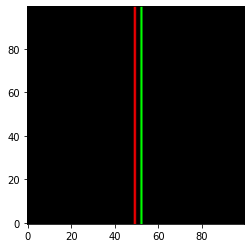

In [ ]:
# Example of how to plot an image with a red line at X = 49.
# Note that row = y, column = x value of pixel
example_image = np.zeros(shape = (100, 100, 3))
for row in range(100):
  example_image[row][49] = [255, 0, 0]
  example_image[row][52] = [0, 255, 0]
plt.imshow(example_image, origin="lower")
plt.show()

# Submission details

Click "File" > "Save a Copy in Drive" and rename the file to your netID followed by "_InfoVisHW1." Ex. "bsl334_InfoVisHW1.ipynb"

You will be submitting your Colab notebook along with your three camera perspective images. 



Grading

```
Single triangle with MVP (50%)
Single triangle with MVP and anti-aliasing (75%)
Two triangles with MVP, anti-aliasing, and occlusion (100%) 
```